Loading and saving images

The image loading/saving facilities can be found in medpy.io. Loading an image is straightforward with load:

In [2]:
from medpy.io import load
image_data, image_header = load('/home/micbrain/Documents/Important data/dataset_preprocessed_cases/flair/03/flair_tra.nii.gz')

In [20]:
from nifti import *

image_data is a numpy ndarray with the image data and image_header is a header object holding the associated metadata.

Now, to save the image, use save:

In [3]:
print image_data.shape

print image_data.dtype
print image_data

(77, 77, 51)
float32


The image format is automatically deducted from the file ending.

In [28]:
from medpy.io import header
print header.get_pixel_spacing(image_header)
print header.get_offset(image_header)

(3.0, 3.0, 3.0)
(-132.29600524902344, -38.438480377197266, -89.365852355957031)


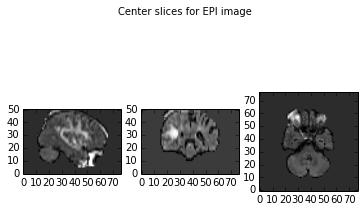

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = image_data[26, :, :]
slice_1 = image_data[:, 30, :]
slice_2 = image_data[:, :, 16]
show_slices([slice_0, slice_1, slice_2])

plt.suptitle("Center slices for EPI image")  


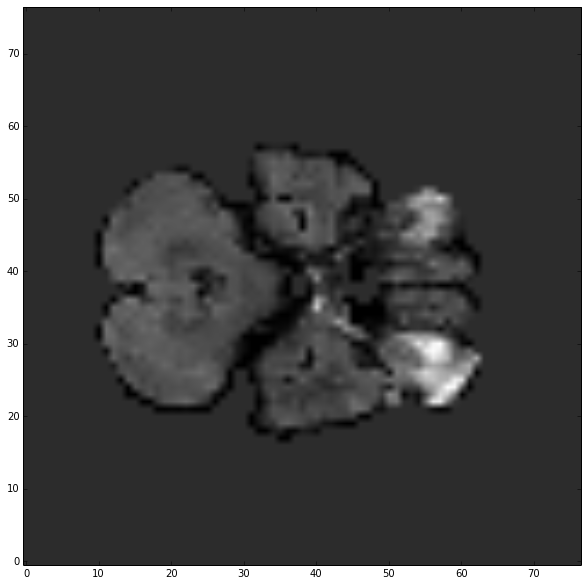

In [13]:
plt.figure(2,figsize=(20,10))
plt.imshow(slice_2, cmap="gray", origin="lower")

In [14]:
from nifti import *

NIfTI files from array data

The next code snipped demonstrates how to create a 4d NIfTI image containing gaussian noise. First we need to import the NumPy module

In [15]:
import numpy as N

Now we generate the noise dataset. Let’s generate noise for 100 volumes with 16 slices and a 32x32 inplane matrix.

In [16]:
noise = N.random.randn(100,16,32,32)

Please notice the order in which the dimensions are specified: (t, z, y, x).

The datatype of the array is by default float64, which can be verified by:

In [17]:
noise.dtype


dtype('float64')

Converting this dataset into a NIfTI image is done by invoking the NiftiImage constructor with the noise dataset as argument:

In [18]:
nim = NiftiImage(noise)

The relevant header information is extracted from the NumPy array. If you query the header information about the dimensionality of the image, it returns the desired values:

In [29]:
print nim.header['dim']


[4, 32, 32, 16, 100, 1, 1, 1]


First value shows the number of dimensions in the datset: 4 (good, that’s what we wanted). The following numbers are dataset size on the x, y, z, t, u, v, w axis (NIfTI files can handle up to 7 dimensions). Please notice, that the order of dimensions is now ‘correct’: We have 32x32 inplane resolution, 16 slices in z direction and 100 volumes.

Also the datatype was set appropriately:

Select ROIs

Now we select the first ten volumes and store them to another file, while preserving as much header information as possible

In [32]:
nim2 = NiftiImage(nim.data[:10], nim.header)

The NiftiImage constructor takes a dictionary with header information as an optional argument. Settings that are not determined by the array (e.g. size, datatype) are taken from the dictionary and stored to the new NIfTI image.
Linear detrending of timeseries (SciPy module is required for this example)

Let’s load another 4d NIfTI file and perform a linear detrending, by fitting a straight line to the timeseries of each voxel and substract that fit from the data. Although this might sound complicated at first, thanks to the excellent SciPy module it is just a few lines of code. For this example we will first create a NIfTI image with just a single voxel and 50 timepoints (basically a linear function with some noise):

If everything went fine, we can now view a slice (x,y):

In [33]:
import pylab as P

In [35]:
volume = nim.data[0]

In [36]:
xyplot = P.imshow(volume[16],interpolation='nearest',cmap=P.cm.gray)

IndexError: index 16 is out of bounds for axis 0 with size 16

Again a call to the P.show() function would render the plot on the screen.

When you want to have a look at a yz-slice, NumPy array magic comes into play.

In [31]:
yzplot = P.imshow(volume[::-1,:,18],interpolation='nearest',cmap=P.cm.gray)

NameError: name 'P' is not defined

The ::-1 notation causes the z-axis to be flipped in the images. This makes a much nicer view, if the used example volume has the z-axis originally oriented upsidedown.